In [10]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

In [4]:
df_cytokine = pd.read_csv("C:/Users/rheas/cytokine_abundance.txt",sep='\t')
df_cytokine.columns = [str(col) + '+cytokine' for col in df_cytokine.columns]
df_cytokine.rename(columns={'SampleID+cytokine': 'SampleID'}, inplace=True)

In [5]:
df_cytokine.head()

,SampleID,IL17F+cytokine,FASL+cytokine,TGFA+cytokine,MIP1A+cytokine,SDF1A+cytokine,IL27+cytokine,LIF+cytokine,IL1B+cytokine,IL2+cytokine,...,PDGFBB+cytokine,VEGF+cytokine,LEPTIN+cytokine,PAI1+cytokine,CD40L+cytokine,ENA78+cytokine,CHEX1+cytokine,CHEX2+cytokine,CHEX3+cytokine,CHEX4+cytokine
0,ZOZOW1T-1012,184.444488,13.607622,20.587480,57.739170,180.058623,22.069171,39.093968,21.497781,36.660824,...,110.620974,328.419949,24.905273,9902.316196,412.631143,141.073916,10469.596340,858.356296,1461.456488,12.783104
1,ZOZOW1T-1013,147.360411,19.314044,17.336825,52.927572,158.574355,23.908268,41.098787,21.497781,30.376112,...,141.098181,282.178420,24.905273,8968.831660,175.134377,165.722518,9957.125873,798.544182,1312.449108,12.783104
2,ZOZOW1T-1015,138.577340,14.046578,14.086170,53.462194,174.431791,22.988720,37.590354,24.301840,27.757481,...,110.620974,296.366162,25.424133,8677.616398,345.071888,152.087121,10165.621460,751.848760,1260.148504,12.783104
3,ZOZOW1T-1021,155.655534,17.558222,17.336825,53.462194,164.712717,24.368043,34.081921,19.628409,30.376112,...,88.045265,325.792589,35.282470,8934.923033,313.890693,126.914080,10167.570020,704.628671,1198.473264,12.291446
4,ZOZOW1T-1022,176.637314,18.436133,26.005238,59.877657,154.482114,26.666915,37.089150,20.563095,26.186303,...,99.897512,362.575624,42.546508,8892.537251,392.883053,104.887670,10042.375240,825.826901,1348.960850,14.258077


In [7]:
df_cytokine.isnull().sum()

SampleID          0
IL17F+cytokine    0
FASL+cytokine     0
TGFA+cytokine     0
MIP1A+cytokine    0
                 ..
ENA78+cytokine    0
CHEX1+cytokine    0
CHEX2+cytokine    0
CHEX3+cytokine    0
CHEX4+cytokine    0
Length: 67, dtype: int64

In [8]:
df_cytokine.isna().sum()

SampleID          0
IL17F+cytokine    0
FASL+cytokine     0
TGFA+cytokine     0
MIP1A+cytokine    0
                 ..
ENA78+cytokine    0
CHEX1+cytokine    0
CHEX2+cytokine    0
CHEX3+cytokine    0
CHEX4+cytokine    0
Length: 67, dtype: int64

In [16]:
cor_matrix = df_cytokine.iloc[:,1:].corr()
na = np.min(cor_matrix)
print(np.min(na))

-0.1782284596208773


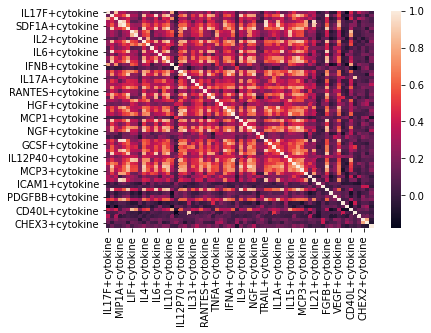

In [11]:
heatmap = sns.heatmap(df_cytokine.iloc[:,1:].corr())

In [17]:
#Normalising the data in the range 0-1
result = df_cytokine.iloc[:,1:].apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

In [18]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr # extracting a list of columns with high threshold

In [26]:
cor_coln = correlation(df_cytokine,0.7)
print(len(cor_coln))

34


In [27]:
cor_coln = list(cor_coln)

In [28]:
df=df_cytokine.copy()
df.head()
print(len(df.columns))

67


In [29]:
df.drop([col for col in df.columns if col not in cor_coln],axis=1,inplace=True)
print(len(df.columns))
df

34


,TGFA+cytokine,SDF1A+cytokine,IL27+cytokine,IL1B+cytokine,IL4+cytokine,IL5+cytokine,IL6+cytokine,IL8+cytokine,IL10+cytokine,IFNB+cytokine,...,IL15+cytokine,MCSF+cytokine,MCP3+cytokine,MIG+cytokine,IL21+cytokine,FGFB+cytokine,VEGF+cytokine,CD40L+cytokine,ENA78+cytokine,CHEX3+cytokine
0,20.587480,180.058623,22.069171,21.497781,40.206498,40.906509,38.310666,26.547731,88.952305,62.727569,...,34.414860,34.942432,47.821207,91.889188,38.858404,41.951944,328.419949,412.631143,141.073916,1461.456488
1,17.336825,158.574355,23.908268,21.497781,39.710121,52.444242,37.825721,25.197846,85.245959,55.866741,...,31.546955,33.971809,42.453521,50.938572,30.899454,51.160908,282.178420,175.134377,165.722518,1312.449108
2,14.086170,174.431791,22.988720,24.301840,40.702874,45.626491,32.006379,24.297923,87.893349,50.966150,...,31.068970,38.824924,48.309179,54.933754,33.240321,47.068035,296.366162,345.071888,152.087121,1260.148504
3,17.336825,164.712717,24.368043,19.628409,37.724615,37.759854,35.885940,25.197846,73.067964,54.886623,...,33.458891,39.795547,38.061777,62.924118,30.899454,49.114471,325.792589,313.890693,126.914080,1198.473264
4,26.005238,154.482114,26.666915,20.563095,39.710121,36.710969,44.614953,26.097769,85.775437,52.926386,...,36.804780,35.913055,48.309179,107.869917,35.581189,44.509990,362.575624,392.883053,104.887670,1348.960850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,13.949902,197.148603,27.619195,18.478845,35.832611,40.236811,36.145931,25.742545,71.244783,35.792699,...,48.609392,35.682207,39.715676,85.897959,47.828841,41.340286,178.794942,90.107866,298.227910,1193.630511
963,15.112394,213.750590,24.659996,19.505448,34.778710,38.173385,34.080449,30.996126,70.692498,39.148265,...,45.439215,40.007323,37.625377,91.017705,57.394609,44.869335,199.015798,144.172586,269.630713,1251.204421
964,9.159027,96.153178,8.218182,23.676021,25.086591,23.415402,19.258078,14.972705,46.588320,37.000346,...,38.409690,23.795544,32.159528,38.961965,22.367717,22.612360,111.191575,125.373412,250.201647,1252.475316
965,10.568108,107.221170,7.427972,18.414683,27.514326,28.259968,20.146912,15.623692,45.950123,39.681531,...,37.398909,24.928665,33.557769,40.179526,21.891808,23.504953,116.854109,91.584832,295.692855,1346.317123


In [30]:
df_sample = df_cytokine['SampleID']
df_sample
final_df= pd.concat([df_sample,df], join='inner',axis=1)
final_df.head()

,SampleID,TGFA+cytokine,SDF1A+cytokine,IL27+cytokine,IL1B+cytokine,IL4+cytokine,IL5+cytokine,IL6+cytokine,IL8+cytokine,IL10+cytokine,...,IL15+cytokine,MCSF+cytokine,MCP3+cytokine,MIG+cytokine,IL21+cytokine,FGFB+cytokine,VEGF+cytokine,CD40L+cytokine,ENA78+cytokine,CHEX3+cytokine
0,ZOZOW1T-1012,20.587480,180.058623,22.069171,21.497781,40.206498,40.906509,38.310666,26.547731,88.952305,...,34.414860,34.942432,47.821207,91.889188,38.858404,41.951944,328.419949,412.631143,141.073916,1461.456488
1,ZOZOW1T-1013,17.336825,158.574355,23.908268,21.497781,39.710121,52.444242,37.825721,25.197846,85.245959,...,31.546955,33.971809,42.453521,50.938572,30.899454,51.160908,282.178420,175.134377,165.722518,1312.449108
2,ZOZOW1T-1015,14.086170,174.431791,22.988720,24.301840,40.702874,45.626491,32.006379,24.297923,87.893349,...,31.068970,38.824924,48.309179,54.933754,33.240321,47.068035,296.366162,345.071888,152.087121,1260.148504
3,ZOZOW1T-1021,17.336825,164.712717,24.368043,19.628409,37.724615,37.759854,35.885940,25.197846,73.067964,...,33.458891,39.795547,38.061777,62.924118,30.899454,49.114471,325.792589,313.890693,126.914080,1198.473264
4,ZOZOW1T-1022,26.005238,154.482114,26.666915,20.563095,39.710121,36.710969,44.614953,26.097769,85.775437,...,36.804780,35.913055,48.309179,107.869917,35.581189,44.509990,362.575624,392.883053,104.887670,1348.960850


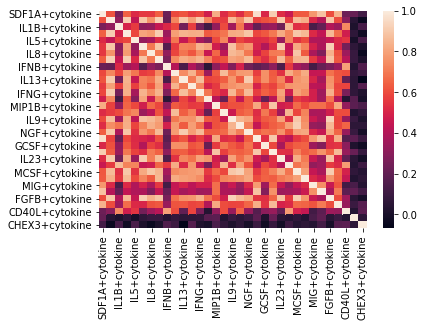

In [32]:
heatmap = sns.heatmap(df.iloc[:,1:].corr())

In [31]:
final_df.to_csv('Final_cytokine.csv')